In [1]:
from sympy import *
from IPython.display import display, Math, Latex

- `x -> mass` 
- `y -> composition (mean molecular weight)` 


- `z -> radius`
- `p -> pressure`
- `t -> temperature`
- `s -> luminosity` 
- `d -> density` 
- `e -> energy` 
- `k -> opacity`

power law exponents: 
- `alpha  -> pressure    (density power law)`
- `-delta -> temperature (density power law)`
- `phi    -> composition (density power law)`
- `lambda -> density     (energy  power law)`
- `nu     -> temperature (energy  power law)`
- `a      -> pressure    (opacity power law)`
- `b      -> temperature (opacity power law)`


- `tilde epsilon -> ratio of energy generation constants for the two models` 
- `tilde kappa   -> ratio of           opacity constants for the two models` 


- `z = x^z1 y^z2 (tilde epsilon)^z3 (tilde kappa)^z4`

etc. 

In [2]:
init_printing()

In [3]:
# Kippenhahn, Weigert, Weiss pg. 236 
alpha, delta, lambd, nu, phi, a, b = symbols('alpha, delta, lambda, nu, phi, a, b')
z1,z2,z3,z4 = symbols('z1,z2,z3,z4')
p1,p2,p3,p4 = symbols('p1,p2,p3,p4')
t1,t2,t3,t4 = symbols('t1,t2,t3,t4')
s1,s2,s3,s4 = symbols('s1,s2,s3,s4')

In [4]:
LHS1 = Matrix([z1, p1, t1, s1])
LHS2 = Matrix([z2, p2, t2, s2])
LHS3 = Matrix([z3, p3, t3, s3])
LHS4 = Matrix([z4, p4, t4, s4])

RHS1 = Matrix([-1,  -2,         -1, -1])
RHS2 = Matrix([phi,  0, -lambd*phi,  0])
RHS3 = Matrix([0,    0,         -1,  0])
RHS4 = Matrix([0,    0,          0, -1])

In [5]:
LHS = Matrix([[-3,      -alpha,          delta,  0],
              [-4,          -1,              0,  0],
              [ 0, lambd*alpha, nu-lambd*delta, -1],
              [-4,           a,            b-4,  1]])

display(LHS)

⎡-3  -α      δ      0 ⎤
⎢                     ⎥
⎢-4  -1      0      0 ⎥
⎢                     ⎥
⎢0   α⋅λ  -δ⋅λ + ν  -1⎥
⎢                     ⎥
⎣-4   a    b - 4    1 ⎦

In [6]:
display(Math(latex(LHS) + ' ' + \
             latex(Matrix(symbols('z_i, p_i, t_i, s_i'))) + '=' + \
             latex(RHS1) + ',' + \
             latex(RHS2) + ',' + \
             latex(RHS3) + ',' + \
             latex(RHS4)))

<IPython.core.display.Math object>

In [7]:
print('System 1')
display(Eq(LHS * LHS1, RHS1))

System 1


⎡     -α⋅p₁ + δ⋅t₁ - 3⋅z₁     ⎤   ⎡-1⎤
⎢                             ⎥   ⎢  ⎥
⎢         -p₁ - 4⋅z₁          ⎥   ⎢-2⎥
⎢                             ⎥ = ⎢  ⎥
⎢ α⋅λ⋅p₁ - s₁ + t₁⋅(-δ⋅λ + ν) ⎥   ⎢-1⎥
⎢                             ⎥   ⎢  ⎥
⎣a⋅p₁ + s₁ + t₁⋅(b - 4) - 4⋅z₁⎦   ⎣-1⎦

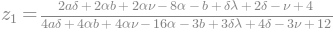

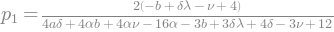

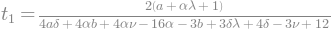

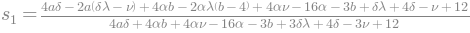

In [8]:
sol1 = solve(LHS * LHS1 - RHS1, LHS1)

for key in sol1:
    display(Eq(key, simplify(sol1[key])))

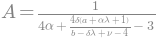

Check that solutions agree with Kippenhahn


True

True

True

True

In [9]:
A = (4*delta * (1+a+lambd*alpha) / (nu + b - 4 - lambd*delta) + 4*alpha - 3)**-1
display(Eq(Symbol('A'), A))
print("Check that solutions agree with Kippenhahn")
z1kip = Rational(1, 2) * (1+Symbol('A'))
p1kip = -2 * Symbol('A')
t1kip = 1/(2*delta) * (1 + (3-4*alpha) * Symbol('A'))
s1kip = (1+(4-b)/(2*delta) + (2 + 2*a + (3-4*alpha)/(2*delta) * (4-b)) * Symbol('A'))
display(Eq(z1, z1kip))
display(simplify(sol1[z1] - z1kip.subs({Symbol('A'): A})) == 0)
display(Eq(p1, p1kip))
display(simplify(sol1[p1] - p1kip.subs({Symbol('A'): A})) == 0)
display(Eq(t1, t1kip))
display(simplify(sol1[t1] - t1kip.subs({Symbol('A'): A})) == 0)
display(Eq(s1, s1kip))
display(simplify(sol1[s1] - s1kip.subs({Symbol('A'): A})) == 0)

In [10]:
print('System 2')
display(Eq(LHS * LHS2, RHS2))

System 2


⎡     -α⋅p₂ + δ⋅t₂ - 3⋅z₂     ⎤   ⎡ φ  ⎤
⎢                             ⎥   ⎢    ⎥
⎢         -p₂ - 4⋅z₂          ⎥   ⎢ 0  ⎥
⎢                             ⎥ = ⎢    ⎥
⎢ α⋅λ⋅p₂ - s₂ + t₂⋅(-δ⋅λ + ν) ⎥   ⎢-λ⋅φ⎥
⎢                             ⎥   ⎢    ⎥
⎣a⋅p₂ + s₂ + t₂⋅(b - 4) - 4⋅z₂⎦   ⎣ 0  ⎦

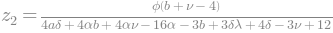

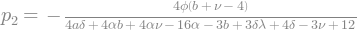

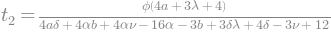

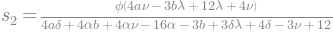

In [11]:
sol2 = solve(LHS * LHS2 - RHS2, LHS2)

for key in sol2:
    display(Eq(key, simplify(sol2[key])))

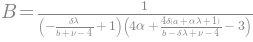

Check that solutions agree with Kippenhahn


True

True

True

True

In [12]:
B = A * (1 - lambd*delta / (nu+b-4))**-1
display(Eq(Symbol('B'), B))
print("Check that solutions agree with Kippenhahn")
z2kip = phi*Symbol('B')
p2kip = -4*phi*Symbol('B')
t2kip = (phi/delta * (1+(3-4*alpha)*Symbol('B')))
s2kip = (phi/delta * (4-b) + phi*(4+4*a + (3-4*alpha)/delta * (4-b))*Symbol('B'))
display(Eq(z2, z2kip))
display(simplify(sol2[z2] - z2kip.subs({Symbol('B'): B})) == 0)
display(Eq(p2, p2kip))
display(simplify(sol2[p2] - p2kip.subs({Symbol('B'): B})) == 0)
display(Eq(t2, t2kip))
display(simplify(sol2[t2] - t2kip.subs({Symbol('B'): B})) == 0)
display(Eq(s2, s2kip))
display(simplify(sol2[s2] - s2kip.subs({Symbol('B'): B})) == 0)

System 3


⎡      -α⋅p₃ + δ⋅t₃ - 3⋅z₃      ⎤   ⎡z₃⎤
⎢                               ⎥   ⎢  ⎥
⎢          -p₃ - 4⋅z₃           ⎥   ⎢p₃⎥
⎢                               ⎥ = ⎢  ⎥
⎢α⋅λ⋅p₃ - s₃ + t₃⋅(-δ⋅λ + ν) + 1⎥   ⎢t₃⎥
⎢                               ⎥   ⎢  ⎥
⎣ a⋅p₃ + s₃ + t₃⋅(b - 4) - 4⋅z₃ ⎦   ⎣s₃⎦

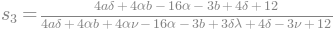

In [13]:
print('System 3')
display(Eq(LHS * LHS3 - RHS3, LHS3))
sol3 = solve(LHS * LHS3 - RHS3, LHS3)

for key in sol3:
    display(Eq(key, simplify(sol3[key])))

System 4


⎡       -α⋅p₄ + δ⋅t₄ - 3⋅z₄       ⎤   ⎡z₄⎤
⎢                                 ⎥   ⎢  ⎥
⎢           -p₄ - 4⋅z₄            ⎥   ⎢p₄⎥
⎢                                 ⎥ = ⎢  ⎥
⎢   α⋅λ⋅p₄ - s₄ + t₄⋅(-δ⋅λ + ν)   ⎥   ⎢t₄⎥
⎢                                 ⎥   ⎢  ⎥
⎣a⋅p₄ + s₄ + t₄⋅(b - 4) - 4⋅z₄ + 1⎦   ⎣s₄⎦

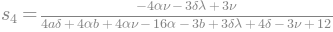

In [14]:
print('System 4')
display(Eq(LHS * LHS4 - RHS4, LHS4))
sol4 = solve(LHS * LHS4 - RHS4, LHS4)

for key in sol4:
    display(Eq(key, simplify(sol4[key])))

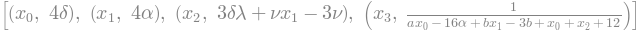

In [15]:
sol = cse([sol4[key] for key in sol4], optimizations='basic')
display(sol[0])
display(sol[1])

In [16]:
print("Polytrope")

_delta = 0
display(Eq(Symbol('delta'), _delta))
subs_dict = {delta:_delta}

display(Eq(Symbol('A'), A.subs(subs_dict)))

def display_system(subs_dict):
    display((Eq(LHS1, Matrix([simplify(sol1[key].subs(subs_dict)) for key in sol1])),
             Eq(LHS2, Matrix([simplify(sol2[key].subs(subs_dict)) for key in sol2]))))
    display((Eq(LHS3, Matrix([simplify(sol3[key].subs(subs_dict)) for key in sol3])),
             Eq(LHS4, Matrix([simplify(sol4[key].subs(subs_dict)) for key in sol4]))))

display_system(subs_dict)

print("...and assuming non-relativistic degenerate electron gas")
_alpha = Rational(3, 5)
display(Eq(Symbol('alpha'), _alpha))
subs_dict = {delta:_delta, alpha:_alpha}

display_system(subs_dict)

Polytrope


⎛       ⎡                          2⋅α - 1                          ⎤         
⎜       ⎢                          ───────                          ⎥         
⎜       ⎢                          4⋅α - 3                          ⎥         
⎜       ⎢                                                           ⎥         
⎜⎡z₁⎤   ⎢                            -2                             ⎥  ⎡z₂⎤   
⎜⎢  ⎥   ⎢                          ───────                          ⎥  ⎢  ⎥   
⎜⎢p₁⎥   ⎢                          4⋅α - 3                          ⎥  ⎢p₂⎥   
⎜⎢  ⎥ = ⎢                                                           ⎥, ⎢  ⎥ = 
⎜⎢t₁⎥   ⎢                      2⋅(a + α⋅λ + 1)                      ⎥  ⎢t₂⎥   
⎜⎢  ⎥   ⎢           ─────────────────────────────────────           ⎥  ⎢  ⎥   
⎜⎣s₁⎦   ⎢           4⋅α⋅b + 4⋅α⋅ν - 16⋅α - 3⋅b - 3⋅ν + 12           ⎥  ⎣s₂⎦   
⎜       ⎢                                                           ⎥         
⎜       ⎢2⋅a⋅ν + 4⋅α⋅b - 2⋅α⋅λ⋅(b - 4) + 4⋅α⋅ν - 16⋅

⎛       ⎡    0    ⎤         ⎡    0    ⎤⎞
⎜       ⎢         ⎥         ⎢         ⎥⎟
⎜⎡z₃⎤   ⎢    0    ⎥  ⎡z₄⎤   ⎢    0    ⎥⎟
⎜⎢  ⎥   ⎢         ⎥  ⎢  ⎥   ⎢         ⎥⎟
⎜⎢p₃⎥   ⎢   -1    ⎥  ⎢p₄⎥   ⎢   -1    ⎥⎟
⎜⎢  ⎥ = ⎢─────────⎥, ⎢  ⎥ = ⎢─────────⎥⎟
⎜⎢t₃⎥   ⎢b + ν - 4⎥  ⎢t₄⎥   ⎢b + ν - 4⎥⎟
⎜⎢  ⎥   ⎢         ⎥  ⎢  ⎥   ⎢         ⎥⎟
⎜⎣s₃⎦   ⎢  b - 4  ⎥  ⎣s₄⎦   ⎢   -ν    ⎥⎟
⎜       ⎢─────────⎥         ⎢─────────⎥⎟
⎝       ⎣b + ν - 4⎦         ⎣b + ν - 4⎦⎠

...and assuming non-relativistic degenerate electron gas


⎛                                                      ⎡              -5⋅φ    
⎜       ⎡                -1/3                ⎤         ⎢              ─────   
⎜       ⎢                                    ⎥         ⎢                3     
⎜       ⎢                10/3                ⎥         ⎢                      
⎜⎡z₁⎤   ⎢                                    ⎥  ⎡z₂⎤   ⎢               20⋅φ   
⎜⎢  ⎥   ⎢        -(10⋅a + 6⋅λ + 10)          ⎥  ⎢  ⎥   ⎢               ────   
⎜⎢p₁⎥   ⎢        ───────────────────         ⎥  ⎢p₂⎥   ⎢                3     
⎜⎢  ⎥ = ⎢           3⋅b + 3⋅ν - 12           ⎥, ⎢  ⎥ = ⎢                      
⎜⎢t₁⎥   ⎢                                    ⎥  ⎢t₂⎥   ⎢      -5⋅φ⋅(4⋅a + 3⋅λ 
⎜⎢  ⎥   ⎢  10⋅a⋅ν                     7⋅ν    ⎥  ⎢  ⎥   ⎢      ────────────────
⎜⎣s₁⎦   ⎢- ────── + b + 2⋅λ⋅(b - 4) - ─── - 4⎥  ⎣s₂⎦   ⎢          3⋅b + 3⋅ν - 
⎜       ⎢    3                         3     ⎥         ⎢                      
⎜       ⎢────────────────────────────────────⎥      

⎛       ⎡    0    ⎤         ⎡    0    ⎤⎞
⎜       ⎢         ⎥         ⎢         ⎥⎟
⎜⎡z₃⎤   ⎢    0    ⎥  ⎡z₄⎤   ⎢    0    ⎥⎟
⎜⎢  ⎥   ⎢         ⎥  ⎢  ⎥   ⎢         ⎥⎟
⎜⎢p₃⎥   ⎢   -1    ⎥  ⎢p₄⎥   ⎢   -1    ⎥⎟
⎜⎢  ⎥ = ⎢─────────⎥, ⎢  ⎥ = ⎢─────────⎥⎟
⎜⎢t₃⎥   ⎢b + ν - 4⎥  ⎢t₄⎥   ⎢b + ν - 4⎥⎟
⎜⎢  ⎥   ⎢         ⎥  ⎢  ⎥   ⎢         ⎥⎟
⎜⎣s₃⎦   ⎢  b - 4  ⎥  ⎣s₄⎦   ⎢   -ν    ⎥⎟
⎜       ⎢─────────⎥         ⎢─────────⎥⎟
⎝       ⎣b + ν - 4⎦         ⎣b + ν - 4⎦⎠

In [17]:
print("Now assuming ideal gas...")
display(Math(latex(r"$\alpha = \delta = \phi = 1$")))
_alpha, _delta, _phi = 1, 1, 1

Now assuming ideal gas...


<IPython.core.display.Math object>

In [18]:
print("...and constant opacity")
_a, _b = 0, 0
display(Math(latex(r"$a = b = 0$")))

...and constant opacity


<IPython.core.display.Math object>

In [19]:
subs_dict = {alpha:_alpha, delta:_delta, phi:_phi, a:_a, b:_b}
display_system(subs_dict)

⎛       ⎡  λ + ν - 2  ⎤         ⎡  ν - 4  ⎤⎞
⎜       ⎢  ─────────  ⎥         ⎢ ─────── ⎥⎟
⎜       ⎢   3⋅λ + ν   ⎥         ⎢ 3⋅λ + ν ⎥⎟
⎜⎡z₁⎤   ⎢             ⎥  ⎡z₂⎤   ⎢         ⎥⎟
⎜⎢  ⎥   ⎢2⋅(λ - ν + 4)⎥  ⎢  ⎥   ⎢4⋅(4 - ν)⎥⎟
⎜⎢p₁⎥   ⎢─────────────⎥  ⎢p₂⎥   ⎢─────────⎥⎟
⎜⎢  ⎥ = ⎢   3⋅λ + ν   ⎥, ⎢  ⎥ = ⎢ 3⋅λ + ν ⎥⎟
⎜⎢t₁⎥   ⎢             ⎥  ⎢t₂⎥   ⎢         ⎥⎟
⎜⎢  ⎥   ⎢  2⋅(λ + 1)  ⎥  ⎢  ⎥   ⎢ 3⋅λ + 4 ⎥⎟
⎜⎣s₁⎦   ⎢  ─────────  ⎥  ⎣s₂⎦   ⎢ ─────── ⎥⎟
⎜       ⎢   3⋅λ + ν   ⎥         ⎢ 3⋅λ + ν ⎥⎟
⎜       ⎢             ⎥         ⎢         ⎥⎟
⎝       ⎣      3      ⎦         ⎣    4    ⎦⎠

⎛       ⎡   1   ⎤         ⎡   1   ⎤⎞
⎜       ⎢───────⎥         ⎢───────⎥⎟
⎜       ⎢3⋅λ + ν⎥         ⎢3⋅λ + ν⎥⎟
⎜⎡z₃⎤   ⎢       ⎥  ⎡z₄⎤   ⎢       ⎥⎟
⎜⎢  ⎥   ⎢  -4   ⎥  ⎢  ⎥   ⎢  -4   ⎥⎟
⎜⎢p₃⎥   ⎢───────⎥  ⎢p₄⎥   ⎢───────⎥⎟
⎜⎢  ⎥ = ⎢3⋅λ + ν⎥, ⎢  ⎥ = ⎢3⋅λ + ν⎥⎟
⎜⎢t₃⎥   ⎢       ⎥  ⎢t₄⎥   ⎢       ⎥⎟
⎜⎢  ⎥   ⎢  -1   ⎥  ⎢  ⎥   ⎢  -1   ⎥⎟
⎜⎣s₃⎦   ⎢───────⎥  ⎣s₄⎦   ⎢───────⎥⎟
⎜       ⎢3⋅λ + ν⎥         ⎢3⋅λ + ν⎥⎟
⎜       ⎢       ⎥         ⎢       ⎥⎟
⎝       ⎣   0   ⎦         ⎣  -1   ⎦⎠

In [20]:
def display_eqns(subs_dict):
    sols = [[simplify(sol[key].subs(subs_dict)) for key in sol] 
            for sol in [sol1, sol2, sol3, sol4]]
    sols = list(map(list, zip(*sols))) # matrix transpose 
    
    for ii in range(4):
        if ii == 0: var_str = r"$\frac{R}{R'} = "
        if ii == 1: var_str = r"$\frac{P}{P'} = "
        if ii == 2: var_str = r"$\frac{T}{T'} = "
        if ii == 3: var_str = r"$\frac{L}{L'} = "
        for jj, z_ in enumerate(sols[ii]):
            if z_ == 0: continue 
            if jj == 0: var_str += r"\left(\frac{M}       {M'}       \right)^{" + str(z_) + "}"
            if jj == 1: var_str += r"\left(\frac{\mu}     {\mu'}     \right)^{" + str(z_) + "}"
            if jj == 2: var_str += r"\left(\frac{\epsilon}{\epsilon'}\right)^{" + str(z_) + "}"
            if jj == 3: var_str += r"\left(\frac{\kappa}  {\kappa'}  \right)^{" + str(z_) + "}"
        display(Math(latex(var_str)))

In [21]:
_lambd = 1
print('with an energy generation rate that scales linearly with density')

for _nu in [4, 15]:
    display((Eq(lambd, _lambd), Eq(nu, _nu)))
    subs_dict = {alpha:_alpha, delta:_delta, phi:_phi, a:_a, b:_b, lambd:_lambd, nu:_nu}
    display_system(subs_dict)
    display_eqns(subs_dict)

with an energy generation rate that scales linearly with density


⎛⎡z₁⎤   ⎡3/7⎤  ⎡z₂⎤   ⎡0⎤⎞
⎜⎢  ⎥   ⎢   ⎥  ⎢  ⎥   ⎢ ⎥⎟
⎜⎢p₁⎥   ⎢2/7⎥  ⎢p₂⎥   ⎢0⎥⎟
⎜⎢  ⎥ = ⎢   ⎥, ⎢  ⎥ = ⎢ ⎥⎟
⎜⎢t₁⎥   ⎢4/7⎥  ⎢t₂⎥   ⎢1⎥⎟
⎜⎢  ⎥   ⎢   ⎥  ⎢  ⎥   ⎢ ⎥⎟
⎝⎣s₁⎦   ⎣ 3 ⎦  ⎣s₂⎦   ⎣4⎦⎠

⎛⎡z₃⎤   ⎡1/7 ⎤  ⎡z₄⎤   ⎡1/7 ⎤⎞
⎜⎢  ⎥   ⎢    ⎥  ⎢  ⎥   ⎢    ⎥⎟
⎜⎢p₃⎥   ⎢-4/7⎥  ⎢p₄⎥   ⎢-4/7⎥⎟
⎜⎢  ⎥ = ⎢    ⎥, ⎢  ⎥ = ⎢    ⎥⎟
⎜⎢t₃⎥   ⎢-1/7⎥  ⎢t₄⎥   ⎢-1/7⎥⎟
⎜⎢  ⎥   ⎢    ⎥  ⎢  ⎥   ⎢    ⎥⎟
⎝⎣s₃⎦   ⎣ 0  ⎦  ⎣s₄⎦   ⎣ -1 ⎦⎠

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

⎛                       ⎡ 11  ⎤⎞
⎜⎡z₁⎤   ⎡ 7/9 ⎤  ⎡z₂⎤   ⎢ ──  ⎥⎟
⎜⎢  ⎥   ⎢     ⎥  ⎢  ⎥   ⎢ 18  ⎥⎟
⎜⎢p₁⎥   ⎢-10/9⎥  ⎢p₂⎥   ⎢     ⎥⎟
⎜⎢  ⎥ = ⎢     ⎥, ⎢  ⎥ = ⎢-22/9⎥⎟
⎜⎢t₁⎥   ⎢ 2/9 ⎥  ⎢t₂⎥   ⎢     ⎥⎟
⎜⎢  ⎥   ⎢     ⎥  ⎢  ⎥   ⎢7/18 ⎥⎟
⎜⎣s₁⎦   ⎣  3  ⎦  ⎣s₂⎦   ⎢     ⎥⎟
⎝                       ⎣  4  ⎦⎠

⎛⎡z₃⎤   ⎡1/18 ⎤  ⎡z₄⎤   ⎡1/18 ⎤⎞
⎜⎢  ⎥   ⎢     ⎥  ⎢  ⎥   ⎢     ⎥⎟
⎜⎢p₃⎥   ⎢-2/9 ⎥  ⎢p₄⎥   ⎢-2/9 ⎥⎟
⎜⎢  ⎥ = ⎢     ⎥, ⎢  ⎥ = ⎢     ⎥⎟
⎜⎢t₃⎥   ⎢-1/18⎥  ⎢t₄⎥   ⎢-1/18⎥⎟
⎜⎢  ⎥   ⎢     ⎥  ⎢  ⎥   ⎢     ⎥⎟
⎝⎣s₃⎦   ⎣  0  ⎦  ⎣s₄⎦   ⎣ -1  ⎦⎠

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [22]:
print("...or, an opacity from Kramer's law")
_a = 1
_b = Rational(-9, 2)
display((Eq(a, _a),
         Eq(b, _b)))

subs_dict = {alpha:_alpha, delta:_delta, phi:_phi, a:_a, b:_b}
display_system(subs_dict)

_lambd = 1
print('now again assuming an energy generation rate that scales linearly with density')
display(Eq(lambd, _lambd))

for _nu in [4, 15]:
    display((Eq(lambd, _lambd), Eq(nu, _nu)))
    subs_dict = {alpha:_alpha, delta:_delta, phi:_phi, a:_a, b:_b, lambd:_lambd, nu:_nu}
    display_system(subs_dict)
    display_eqns(subs_dict)

...or, an opacity from Kramer's law


⎛       ⎡  2⋅λ + 2⋅ν - 9   ⎤         ⎡   2⋅ν - 17  ⎤⎞
⎜       ⎢  ─────────────   ⎥         ⎢─────────────⎥⎟
⎜       ⎢  6⋅λ + 2⋅ν - 1   ⎥         ⎢6⋅λ + 2⋅ν - 1⎥⎟
⎜       ⎢                  ⎥         ⎢             ⎥⎟
⎜⎡z₁⎤   ⎢2⋅(2⋅λ - 2⋅ν + 17)⎥  ⎡z₂⎤   ⎢ 4⋅(17 - 2⋅ν)⎥⎟
⎜⎢  ⎥   ⎢──────────────────⎥  ⎢  ⎥   ⎢─────────────⎥⎟
⎜⎢p₁⎥   ⎢  6⋅λ + 2⋅ν - 1   ⎥  ⎢p₂⎥   ⎢6⋅λ + 2⋅ν - 1⎥⎟
⎜⎢  ⎥ = ⎢                  ⎥, ⎢  ⎥ = ⎢             ⎥⎟
⎜⎢t₁⎥   ⎢    4⋅(λ + 2)     ⎥  ⎢t₂⎥   ⎢ 2⋅(3⋅λ + 8) ⎥⎟
⎜⎢  ⎥   ⎢  ─────────────   ⎥  ⎢  ⎥   ⎢─────────────⎥⎟
⎜⎣s₁⎦   ⎢  6⋅λ + 2⋅ν - 1   ⎥  ⎣s₂⎦   ⎢6⋅λ + 2⋅ν - 1⎥⎟
⎜       ⎢                  ⎥         ⎢             ⎥⎟
⎜       ⎢ 32⋅λ + 10⋅ν - 1  ⎥         ⎢ 51⋅λ + 16⋅ν ⎥⎟
⎜       ⎢ ───────────────  ⎥         ⎢─────────────⎥⎟
⎝       ⎣  6⋅λ + 2⋅ν - 1   ⎦         ⎣6⋅λ + 2⋅ν - 1⎦⎠

⎛       ⎡      2      ⎤         ⎡      2      ⎤⎞
⎜       ⎢─────────────⎥         ⎢─────────────⎥⎟
⎜       ⎢6⋅λ + 2⋅ν - 1⎥         ⎢6⋅λ + 2⋅ν - 1⎥⎟
⎜       ⎢             ⎥         ⎢             ⎥⎟
⎜⎡z₃⎤   ⎢     -8      ⎥  ⎡z₄⎤   ⎢     -8      ⎥⎟
⎜⎢  ⎥   ⎢─────────────⎥  ⎢  ⎥   ⎢─────────────⎥⎟
⎜⎢p₃⎥   ⎢6⋅λ + 2⋅ν - 1⎥  ⎢p₄⎥   ⎢6⋅λ + 2⋅ν - 1⎥⎟
⎜⎢  ⎥ = ⎢             ⎥, ⎢  ⎥ = ⎢             ⎥⎟
⎜⎢t₃⎥   ⎢     -2      ⎥  ⎢t₄⎥   ⎢     -2      ⎥⎟
⎜⎢  ⎥   ⎢─────────────⎥  ⎢  ⎥   ⎢─────────────⎥⎟
⎜⎣s₃⎦   ⎢6⋅λ + 2⋅ν - 1⎥  ⎣s₄⎦   ⎢6⋅λ + 2⋅ν - 1⎥⎟
⎜       ⎢             ⎥         ⎢             ⎥⎟
⎜       ⎢     -1      ⎥         ⎢-(6⋅λ + 2⋅ν) ⎥⎟
⎜       ⎢─────────────⎥         ⎢─────────────⎥⎟
⎝       ⎣6⋅λ + 2⋅ν - 1⎦         ⎣6⋅λ + 2⋅ν - 1⎦⎠

now again assuming an energy generation rate that scales linearly with density


⎛       ⎡1/13⎤         ⎡-9/13⎤⎞
⎜       ⎢    ⎥         ⎢     ⎥⎟
⎜       ⎢ 22 ⎥         ⎢ 36  ⎥⎟
⎜⎡z₁⎤   ⎢ ── ⎥  ⎡z₂⎤   ⎢ ──  ⎥⎟
⎜⎢  ⎥   ⎢ 13 ⎥  ⎢  ⎥   ⎢ 13  ⎥⎟
⎜⎢p₁⎥   ⎢    ⎥  ⎢p₂⎥   ⎢     ⎥⎟
⎜⎢  ⎥ = ⎢ 12 ⎥, ⎢  ⎥ = ⎢ 22  ⎥⎟
⎜⎢t₁⎥   ⎢ ── ⎥  ⎢t₂⎥   ⎢ ──  ⎥⎟
⎜⎢  ⎥   ⎢ 13 ⎥  ⎢  ⎥   ⎢ 13  ⎥⎟
⎜⎣s₁⎦   ⎢    ⎥  ⎣s₂⎦   ⎢     ⎥⎟
⎜       ⎢ 71 ⎥         ⎢ 115 ⎥⎟
⎜       ⎢ ── ⎥         ⎢ ─── ⎥⎟
⎝       ⎣ 13 ⎦         ⎣  13 ⎦⎠

⎛                       ⎡2/13 ⎤⎞
⎜⎡z₃⎤   ⎡2/13 ⎤  ⎡z₄⎤   ⎢     ⎥⎟
⎜⎢  ⎥   ⎢     ⎥  ⎢  ⎥   ⎢-8/13⎥⎟
⎜⎢p₃⎥   ⎢-8/13⎥  ⎢p₄⎥   ⎢     ⎥⎟
⎜⎢  ⎥ = ⎢     ⎥, ⎢  ⎥ = ⎢-2/13⎥⎟
⎜⎢t₃⎥   ⎢-2/13⎥  ⎢t₄⎥   ⎢     ⎥⎟
⎜⎢  ⎥   ⎢     ⎥  ⎢  ⎥   ⎢-14  ⎥⎟
⎜⎣s₃⎦   ⎣-1/13⎦  ⎣s₄⎦   ⎢──── ⎥⎟
⎝                       ⎣ 13  ⎦⎠

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

⎛       ⎡ 23 ⎤         ⎡ 13 ⎤⎞
⎜       ⎢ ── ⎥         ⎢ ── ⎥⎟
⎜       ⎢ 35 ⎥         ⎢ 35 ⎥⎟
⎜       ⎢    ⎥         ⎢    ⎥⎟
⎜⎡z₁⎤   ⎢-22 ⎥  ⎡z₂⎤   ⎢-52 ⎥⎟
⎜⎢  ⎥   ⎢────⎥  ⎢  ⎥   ⎢────⎥⎟
⎜⎢p₁⎥   ⎢ 35 ⎥  ⎢p₂⎥   ⎢ 35 ⎥⎟
⎜⎢  ⎥ = ⎢    ⎥, ⎢  ⎥ = ⎢    ⎥⎟
⎜⎢t₁⎥   ⎢ 12 ⎥  ⎢t₂⎥   ⎢ 22 ⎥⎟
⎜⎢  ⎥   ⎢ ── ⎥  ⎢  ⎥   ⎢ ── ⎥⎟
⎜⎣s₁⎦   ⎢ 35 ⎥  ⎣s₂⎦   ⎢ 35 ⎥⎟
⎜       ⎢    ⎥         ⎢    ⎥⎟
⎜       ⎢181 ⎥         ⎢291 ⎥⎟
⎜       ⎢─── ⎥         ⎢─── ⎥⎟
⎝       ⎣ 35 ⎦         ⎣ 35 ⎦⎠

⎛                       ⎡2/35 ⎤⎞
⎜⎡z₃⎤   ⎡2/35 ⎤  ⎡z₄⎤   ⎢     ⎥⎟
⎜⎢  ⎥   ⎢     ⎥  ⎢  ⎥   ⎢-8/35⎥⎟
⎜⎢p₃⎥   ⎢-8/35⎥  ⎢p₄⎥   ⎢     ⎥⎟
⎜⎢  ⎥ = ⎢     ⎥, ⎢  ⎥ = ⎢-2/35⎥⎟
⎜⎢t₃⎥   ⎢-2/35⎥  ⎢t₄⎥   ⎢     ⎥⎟
⎜⎢  ⎥   ⎢     ⎥  ⎢  ⎥   ⎢-36  ⎥⎟
⎜⎣s₃⎦   ⎣-1/35⎦  ⎣s₄⎦   ⎢──── ⎥⎟
⎝                       ⎣ 35  ⎦⎠

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>